# Movie Times Analysis

You ever watch a movie and just think, "Wow this could've been a much shorter film to get the story across.."? Yeah, me too. So for this analysis, I want to figure out what happeend and maybe I'm suffering from a fake sense of nostalgia for movies not being nearly as long. Of course there are things like when I was a child I perceived time different ##INSERT LINK HERE## or that kids movies in particular are just not very long to begin with.

## Goal

The goal of this project is to try and figure out what variables might help predict the length of a movie. Some questions to answer are:
* Are average movie lengths getting longer over time?
* Are certain genre's increasing in length over time?
* Is there a way to highlight blockbusters and see if they alone are getting longer?
* Is there a correlation between box office success and the length of the movie?
* Ultimately, what are some reasons movies are starting to get longer.

## Dataset

I'll be using the [The Movie Database](https://www.themoviedb.org/) as my source for movie information. This is essentially a Wikipedia for movies that includes inforamtion such as release date, genre, audience scores, etc...

T&C of using the TMDB API: https://www.themoviedb.org/settings/api/new?type=developer

Let's start with reading data from the API.

In [80]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
API_KEY = 'f202ea0881387cc4640e688954cb6682'
movie_data = []

### Movie List

First we need to get a list of movies to look at. Unforunately, the API we are using doesn't allow us to just loop through each movie, but we can use it to search for movies in a predefined list. For this we're using this [list](https://www.listchallenges.com/60-best-movies-for-the-last-25-years-according) of movies.

In [3]:
movie_list = []
movie_urls = ['https://www.listchallenges.com/60-best-movies-for-the-last-25-years-according','https://www.listchallenges.com/60-best-movies-for-the-last-25-years-according/list/2']
for url in movie_urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.text)
    for text in soup.find_all(class_='item-name'):
        movie_name = text.get_text().strip().split(' (')
        movie_list.append(movie_name[0])

Here is our list of movies:

In [4]:
movie_ids = []
for movie in movie_list:
    movie_url = f'https://api.themoviedb.org/3/search/movie?query={movie}&api_key={API_KEY}'
    # search_urls.append()
    r_movie = requests.get(movie_url)
    movie_ids.append(r_movie.json()['results'][0]['id'])
    print(f'- {movie}')

- Pan's Labyrinth
- The Martian
- Good Will Hunting
- The Hunt
- Downfall
- Up
- The Wolf of Wall Street
- Into the Wild
- Fargo
- Batman Begins
- Inglourious Basterds
- Toy Story
- L.A. Confidential
- Snatch
- Eternal Sunshine of the Spotless Mind
- Requiem for a Dream
- Toy Story 3
- Braveheart
- Reservoir Dogs
- Amélie
- Princess Mononoke
- Old Boy
- Inside Out
- American Beauty
- WALL·E
- The Dark Knight Rises
- Django Unchained
- The Lives of Others
- The Lion King
- The Prestige
- Gladiator
- Memento
- The Departed
- The Pianist
- Whiplash
- Terminator 2: Judgment Day
- The Green Mile
- The Intouchables
- American History X
- Spirited Away
- Saving Private Ryan
- Interstellar
- Leon: The Professional
- Life Is Beautiful
- The Usual Suspects
- The Silence of the Lambs
- Seven
- City of God
- The Matrix
- Goodfellas
- The Lord of the Rings: The Two Towers
- Inception
- Forrest Gump
- The Lord of the Rings: The Fellowship of the Ring
- Fight Club
- The Lord of the Rings: The Return 

Now we'll start to process getting each movie and finding it's ID from our API.

In [5]:
def check_status_code(response):
    '''
    Checks the status code of any URL and API key. URL should include the API KEY as well.
    '''
    try:
        response.raise_for_status()
    # Code here will only run if the request is successful
    except requests.exceptions.HTTPError as errh:
        print(errh)
    except requests.exceptions.ConnectionError as errc:
        print(errc)
    except requests.exceptions.Timeout as errt:
        print(errt)
    except requests.exceptions.RequestException as err:
        print(err)
    # if response.status_code != 200:
    #     return print(f"Failed\nStatus code: {response.status_code}")
    return True


Here we'll just test and see what the API returns and determine what fields we might need.

In [6]:
url = f'https://api.themoviedb.org/3/movie/695721?api_key={API_KEY}'
response = requests.get(f'{url}')

if check_status_code(response):
    jsonResponse = response.json()
    txtResponse = response.text
    print(jsonResponse)

{'adult': False, 'backdrop_path': '/5a4JdoFwll5DRtKMe7JLuGQ9yJm.jpg', 'belongs_to_collection': {'id': 131635, 'name': 'The Hunger Games Collection', 'poster_path': '/fPer2U4uQT1dkXTUWODDaLECWoW.jpg', 'backdrop_path': '/Ipp7cegtub4t0mu7xaKLQkYoGc.jpg'}, 'budget': 100000000, 'genres': [{'id': 18, 'name': 'Drama'}, {'id': 878, 'name': 'Science Fiction'}, {'id': 28, 'name': 'Action'}], 'homepage': 'https://hungergames.movie', 'id': 695721, 'imdb_id': 'tt10545296', 'original_language': 'en', 'original_title': 'The Hunger Games: The Ballad of Songbirds & Snakes', 'overview': '64 years before he becomes the tyrannical president of Panem, Coriolanus Snow sees a chance for a change in fortunes when he mentors Lucy Gray Baird, the female tribute from District 12.', 'popularity': 3233.513, 'poster_path': '/mBaXZ95R2OxueZhvQbcEWy2DqyO.jpg', 'production_companies': [{'id': 1632, 'logo_path': '/cisLn1YAUuptXVBa0xjq7ST9cH0.png', 'name': 'Lionsgate', 'origin_country': 'US'}, {'id': 5420, 'logo_path': 

In [7]:
response.json()

{'adult': False,
 'backdrop_path': '/5a4JdoFwll5DRtKMe7JLuGQ9yJm.jpg',
 'belongs_to_collection': {'id': 131635,
  'name': 'The Hunger Games Collection',
  'poster_path': '/fPer2U4uQT1dkXTUWODDaLECWoW.jpg',
  'backdrop_path': '/Ipp7cegtub4t0mu7xaKLQkYoGc.jpg'},
 'budget': 100000000,
 'genres': [{'id': 18, 'name': 'Drama'},
  {'id': 878, 'name': 'Science Fiction'},
  {'id': 28, 'name': 'Action'}],
 'homepage': 'https://hungergames.movie',
 'id': 695721,
 'imdb_id': 'tt10545296',
 'original_language': 'en',
 'original_title': 'The Hunger Games: The Ballad of Songbirds & Snakes',
 'overview': '64 years before he becomes the tyrannical president of Panem, Coriolanus Snow sees a chance for a change in fortunes when he mentors Lucy Gray Baird, the female tribute from District 12.',
 'popularity': 3233.513,
 'poster_path': '/mBaXZ95R2OxueZhvQbcEWy2DqyO.jpg',
 'production_companies': [{'id': 1632,
   'logo_path': '/cisLn1YAUuptXVBa0xjq7ST9cH0.png',
   'name': 'Lionsgate',
   'origin_country': '

Taking a quick look at the json response from the API, we can see a few fields that we care about.
*Budget, genre(s), production company, revenue, release date, runtime (min)*. We'll look at those fields to see if we can start answer some of those quetsions.

In [73]:
def get_field_data(jsonData, field_name):
    data_from_json = jsonData[field_name]
    return data_from_json

def get_data(jsonData, fields):
    data_dict = {}
    for field in fields:
        data = get_field_data(jsonData, field)
        
        if field == 'genres':
            data_dict[field] = []
            # genres = []

            for row in data:#get_field_data(jsonResponse, 'genres'):
                genre = row['name']
                data_dict[field].append(genre)
                # print(data_dict[field])

        else:
            data_dict[field] = data


    # ## get title
    # title = get_field_data(jsonResponse, 'title')
    # data_dict['movie_title'] = title

    
    # blockbuster flag
    
    budget = float(data_dict['budget'])
    revenue = float(data_dict['revenue'])

    try:
        if revenue/budget > 2.5:
            data_dict['blockbuster_flag'] = 1
        else:
            data_dict['blockbuster_flag'] = 0
    except:
        data_dict['blockbuster_flag'] = 0

    ## get genre(s)
    # genres = []
    # for row in get_field_data(jsonResponse, 'genres'):
    #     genre = row['name']
    #     if genre not in genres:
    #         genres.append(genre)        
    # data_dict['genres'] = genres



    movie_data.append(data_dict)

In [56]:
get_field_data(jsonResponse, 'genres')
   
    

[{'id': 14, 'name': 'Fantasy'},
 {'id': 18, 'name': 'Drama'},
 {'id': 10752, 'name': 'War'}]

In [74]:
movie_data = []
fields_to_get = ['title', 'budget', 'revenue', 'release_date', 'runtime', 'genres']
for movie_id in movie_ids:
    url = f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={API_KEY}'
    response = requests.get(f'{url}')
    if check_status_code(response):
        jsonResponse = response.json()
        txtResponse = response.text
        # print(jsonResponse)
    get_data(jsonResponse, fields_to_get)

In [75]:
movie_data

[{'title': "Pan's Labyrinth",
  'budget': 19000000,
  'revenue': 83258226,
  'release_date': '2006-10-10',
  'runtime': 118,
  'genres': ['Fantasy', 'Drama', 'War'],
  'blockbuster_flag': 1},
 {'title': 'The Martian',
  'budget': 108000000,
  'revenue': 630600000,
  'release_date': '2015-09-30',
  'runtime': 141,
  'genres': ['Drama', 'Adventure', 'Science Fiction'],
  'blockbuster_flag': 1},
 {'title': 'Good Will Hunting',
  'budget': 10000000,
  'revenue': 225900000,
  'release_date': '1997-12-05',
  'runtime': 127,
  'genres': ['Drama'],
  'blockbuster_flag': 1},
 {'title': 'The Hunt',
  'budget': 14000000,
  'revenue': 10550350,
  'release_date': '2020-03-11',
  'runtime': 90,
  'genres': ['Action', 'Thriller', 'Horror'],
  'blockbuster_flag': 0},
 {'title': 'Downfall',
  'budget': 0,
  'revenue': 0,
  'release_date': '1964-01-01',
  'runtime': 59,
  'genres': ['Drama', 'Mystery'],
  'blockbuster_flag': 0},
 {'title': 'Up',
  'budget': 175000000,
  'revenue': 735099082,
  'release_

In [78]:
df = pd.DataFrame(movie_data).explode('genres').reset_index(drop=True)
df

,title,budget,revenue,release_date,runtime,genres,blockbuster_flag
0,Pan's Labyrinth,19000000,83258226,2006-10-10,118,Fantasy,1
1,Pan's Labyrinth,19000000,83258226,2006-10-10,118,Drama,1
2,Pan's Labyrinth,19000000,83258226,2006-10-10,118,War,1
3,The Martian,108000000,630600000,2015-09-30,141,Drama,1
4,The Martian,108000000,630600000,2015-09-30,141,Adventure,1
...,...,...,...,...,...,...,...
152,The Dark Knight,185000000,1004558444,2008-07-16,152,Action,1
153,The Dark Knight,185000000,1004558444,2008-07-16,152,Crime,1
154,The Dark Knight,185000000,1004558444,2008-07-16,152,Thriller,1
155,The Shawshank Redemption,25000000,28341469,1994-09-23,142,Drama,0


In [87]:
df_unique = df.drop_duplicates('title').reset_index(drop=True)


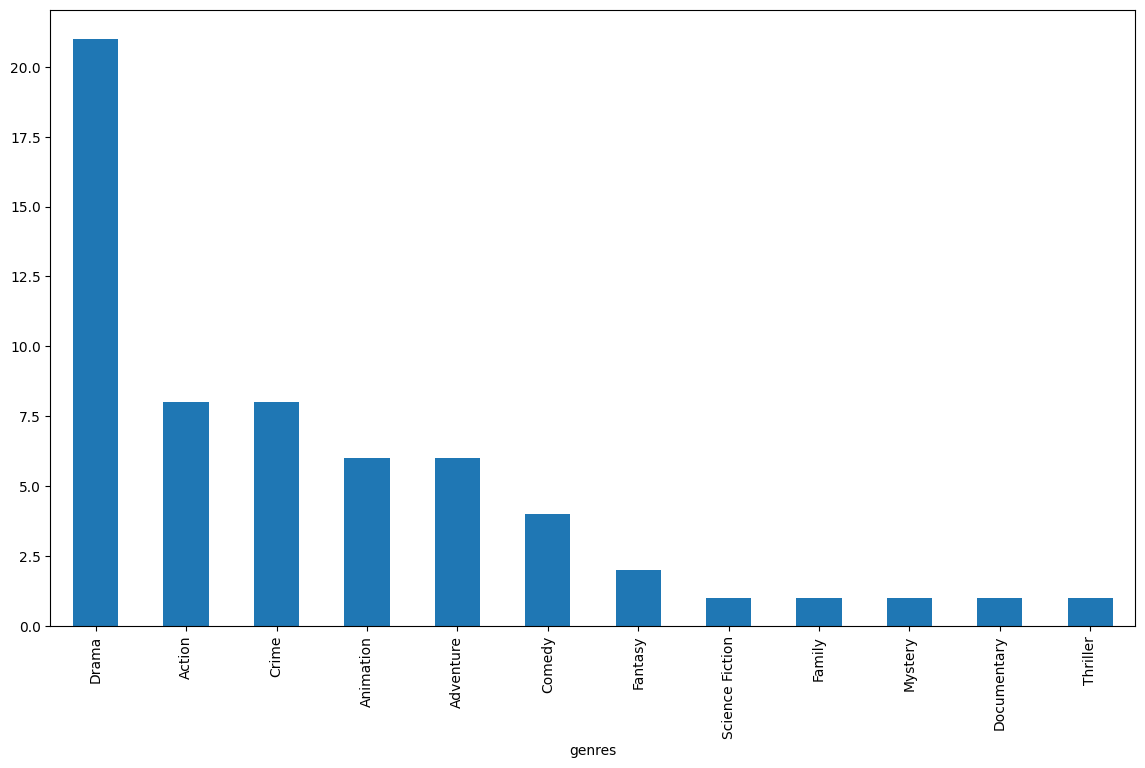

In [91]:
ax = df_unique['genres'].value_counts().plot(kind='bar', figsize=(14,8))